# Homework 5: Probability and Sampling

Please complete this notebook by filling in the cells provided. When you’re done, follow the instructions in [this short explainer video](https://www.youtube.com/watch?v=gMt_Rq43y_4&ab_channel=FahadKamran) to submit your homework.

If you cannot submit online, come to office hours for assistance. The office hours
schedule appears on [data8.org/fa16/weekly.html](http://data8.org/fa16/weekly.html).

This assignment is due Thursday, October 6 at 5PM. You will receive an early submission bonus point if you turn it in by Wednesday, October 5 at 5PM. Directly sharing answers is not okay, but discussing problems with course staff or with other students is encouraged.

Reading:
- Textbook chapters [8](https://www.inferentialthinking.com/chapters/08/randomness.html) and [9](https://www.inferentialthinking.com/chapters/09/empirical-distributions.html)

Run the cell below to prepare the notebook and the tests. **Passing the automatic tests does not guarantee full credit on any question.** The tests are provided to help catch some common errors, but it is *your* responsibility to answer the questions correctly.

In [1]:
# Run this cell to set up the notebook, but please don't change it.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

from client.api.assignment import load_assignment
tests = load_assignment('hw05.ok')

ModuleNotFoundError: No module named 'client'

## 1. How Many Devices?


When a company produces medical devices, it must be sure that its devices will not fail.  Sampling is used ubiquitously in the medical device industry to test how well devices work.

Suppose you work at a company that produces syringes, and you are responsible for ensuring the syringes work well.  After studying the manufacturing process for the syringes, you have a hunch that they have a 1% failure rate.  That is, you suspect that 1% of the syringes won't work when a doctor uses them to inject a patient with medicine.

To test your hunch, you would like to find at least one faulty syringe.  You hire an expert consultant who can test a syringe to check whether it is faulty.  But the expert's time is expensive, so you need to avoid checking more syringes than you need to.

**Important note:** This exercise asks you to compute numbers that are related to probabilities.  For all questions, you can calculate your answer using algebra, **or** you can write and run a simulation to compute an approximately-correct answer.  (For practice, we suggest trying both.)  An answer based on an appropriate simulation will receive full credit.  If you simulate, use at least **5,000** simulations.

**Question 1.** Suppose there is indeed a 1% failure rate among all syringes.  If you check 20 syringes chosen at random from among all syringes, what is the chance that you find at least 1 faulty syringe?  (You may assume that syringes are chosen with replacement from a population in which 1% of syringes are faulty.)  Name your answer `chance_to_find_syringe`.

#### Using Algebra
* The chance of getting a faulty syringe out of 100 syringes is $\frac{1}{100}$
* The chance of getting a non-faulty syringe out of 100 syringes is $ 1 - \frac{1}{100}$
* If we take 20 syringes, the chance of all 20 are non-faulty syringe are $ ({1 - \frac{1}{100}})^{20}$
* Thus, the chance of above not happening is $1 -  ({1 - \frac{1}{100}})^{20}$

In [ ]:
chance_to_find_syringe = 1 - ((1 - 1/100)**20)
chance_to_find_syringe

In [46]:
# For your convenience, we have created a list containing
# 99 copies of the number 0 (to represent good syringes)
# and 1 copy of the number 1 (to represent a bad syringe).
# This may be useful if you run a simulation.  Feel free
# to delete it.
faultiness = np.append(0*np.arange(99), 1)
faultiness_table = Table().with_column('Faultiness', faultiness)
sample_size = 20
repetitions = 5000

#Define a function that takes an array of integers uses np.count_nonzero and if the result is greater than 0, returns 1
def fault_check(array):
    if np.count_nonzero(array) > 0:
        return 1
    else:
        return 0
    
#Define the simulation function
def simulation(size):
    result = make_array()
    
    for i in np.arange(repetitions):
        resample = faultiness_table.sample(size, with_replacement = True)
        result = np.append(result,fault_check(resample.column(0)))
        
    # Returns the proportion of ones in the "result" array
    return np.count_nonzero(result) / len(result)

chance_to_find_syringe = simulation(sample_size)
chance_to_find_syringe

0.1736

In [14]:
_ = tests.grade('q1_1')

NameError: name 'tests' is not defined

**Question 2.** Continue to assume that there really is a 1% failure rate.  Find the smallest number of syringes you can check so that you have at least a 50% chance of finding a faulty syringe.  (Your answer should be an integer.)  Name that number `num_required_for_50_percent`.  **It's okay if your answer is off by as many as 11.**

#### Using Algebra:
We are supposed to solve the following equation:

$0.5 = 1 -  ({1 - \frac{1}{100}})^{x}$

Solving for the equation using Wolfram Alpha, x is roughly **69**

### Using Simulation:

In [56]:
#Use the simulation function and adjust the sample size to the point the chance of finding syringe is coming close to 0.5
integer_table = Table().with_column('Sample Size', np.arange(20, 100))
with_faulty = integer_table.with_column('Chance of Finding Faulty', integer_table.apply(simulation, 'Sample Size'))


num_required_for_50_percent = with_faulty.where('Chance of Finding Faulty', are.above_or_equal_to(0.5)).drop('Chance of Finding Faulty').take(0).column(0).item(0)
num_required_for_50_percent

70

In [31]:
_ = tests.grade('q1_2')

## 2. Monkeys Typing Shakespeare
##### (...or at least the string "datascience")

A monkey is banging repeatedly on the keys of a typewriter. Each time, the monkey is equally likely to hit any of the 26 lowercase letters of the English alphabet, regardless of what it hits at other times. There are no other keys on the keyboard.

**Question 1.** Suppose the monkey hits the keyboard 11 times.  Compute the chance that the monkey types the sequence `datascience`.  (Call this `datascience_chance`.)  Use algebra.

#### Answer:
The word `datascience` is a 11-letters word. This means the word consists of a consecutive 11 times of each picking a certain letter out of 26 letters.
Thus, the chance is $ (\frac{1}{26})^{11} $

In [23]:
datascience_chance = (1/26)**11
datascience_chance

2.7245398995795435e-16

In [8]:
_ = tests.grade('q2_1')

**Question 2.** Write a function called `simulate_key_strike`.  It should take no arguments, and it should return a random one-character string that is equally likely to be any of the 26 lower-case English letters.

In [2]:
# We have provided the code below to compute a list called letters,
# containing all the lower-case English letters.  Print it if you
# want to verify what it contains.
import string
letters = list(string.ascii_lowercase)

def simulate_key_strike():
    """Simulates one random key strike."""
    return np.random.choice(letters)

# An example call to your function:
simulate_key_strike()

'j'

In [9]:
_ = tests.grade('q2_2')

**Question 3.** Write a function called `simulate_several_key_strikes`.  It should take one argument, an integer number of key strikes to simulate.  It should return a *string* containing that many characters, each one a simulated key strike by the monkey.

*Hint:* If you make a list or array of the simulated key strikes, you can convert that to a string by calling `"".join(key_strikes_array)` (if your array is called `key_strikes_array`).

In [4]:
def simulate_several_key_strikes(num_strikes):
    # Fill in this function.  Our solution used several lines
    # of code.
    string_array = make_array()
    for i in np.arange(num_strikes):
        string_array = np.append(string_array, simulate_key_strike())
    return "".join(string_array)

# An example call to your function:
simulate_several_key_strikes(11)

'wylucfrsgcu'

In [10]:
_ = tests.grade('q2_3')

**Question 4.** Use `simulate_several_key_strikes` 1000 times, each time simulating the monkey striking 11 keys.  Compute the proportion of times the monkey types `"datascience"`, calling that proportion `datascience_proportion`.

In [22]:
# Our solution used several lines of code.

repetitions = 1000
num_datascience = 0 #Number of 'datascience' string obtained
for i in np.arange(repetitions):
    if simulate_several_key_strikes(11) == 'datascience':
        num_datascience += 1

datascience_proportion = num_datascience / repetitions
datascience_proportion

0.0

In [11]:
_ = tests.grade('q2_4')

**Question 5.** Check the value your simulation computed for `datascience_proportion`.  Is your simulation a good way to estimate the chance that the monkey types `"datascience"` in 11 strikes (the answer to question 1)?  Why or why not?

#### Answer:
No. It is extremely unlikely for the monkey to type `"datascience"` in 1000 repetitions since we calculated the chance to be 2.72e-16. With that amount of chance, we would need to run the simulation at least $ \frac{1}{chance}$ times

**Question 6.** Compute the chance that the monkey types the letter `"e"` at least once in the 11 strikes.  Call it `e_chance`.

#### Answer:
* The chance of not getting `"e"` in the first strike is $\frac{25}{26}$
* The chance of not getting `"e"` in 11 strikes consecutively is $(\frac{25}{26})^{11}$
* The chance of above not happening is $1 - (\frac{25}{26})^{11}$

In [24]:
e_chance = 1-((25/26)**11)
e_chance

0.35041906843673165

In [ ]:
_ = tests.grade('q2_6')

**Question 7.** In comparison to `datascience_chance`, do you think that a computer simulation would be a more or less effective way to estimate `e_chance`?  Why or why not?  (You don't need to write a simulation, but it is an interesting exercise.)

A computer simulation can estimate `e_chance` well since the value of `e_chance` can be considered reasonable (35%) compared to `datascience_chance` (2.72e-14%).

## 3. Sampling Basketball Players


This exercise uses salary data and game statistics for basketball players from the 2014-2015 NBA season. The data were collected from [basketball-reference](http://www.basketball-reference.com) and [spotrac](http://www.spotrac.com).

Run the next cell to load the two datasets.

In [2]:
player_data = Table.read_table('player_data.csv')
salary_data = Table.read_table('salary_data.csv')
player_data.show(3)
salary_data.show(3)

Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
James Harden,25,HOU,81,459,565,154,60,321,2217
Chris Paul,29,LAC,82,376,838,156,15,190,1564
Stephen Curry,26,GSW,80,341,619,163,16,249,1900


PlayerName,Salary
Kobe Bryant,23500000
Amar'e Stoudemire,23410988
Joe Johnson,23180790


**Question 1.** We would like to relate players' game statistics to their salaries.  Compute a table called `full_data` that includes one row for each player who is listed in both `player_data` and `salary_data`.  It should include all the columns from `player_data` and `salary_data`, except the `"PlayerName"` column.

In [3]:
full_data = player_data.join('Name', salary_data, 'PlayerName')
full_data

Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points,Salary
A.J. Price,28,TOT,26,32,46,7,0,14,133,62552
Aaron Brooks,30,CHI,82,166,261,54,15,157,954,1145685
Aaron Gordon,19,ORL,47,169,33,21,22,38,243,3992040
Adreian Payne,23,TOT,32,162,30,19,9,44,213,1855320
Al Horford,28,ATL,76,544,244,68,98,100,1156,12000000
Al Jefferson,30,CHO,65,548,113,47,84,68,1082,13666667
Al-Farouq Aminu,24,DAL,74,342,59,70,62,55,412,1100602
Alan Anderson,32,BRK,74,204,83,56,5,60,545,1276061
Alec Burks,23,UTA,27,114,82,17,5,52,374,3034356
Alex Kirk,23,CLE,5,1,1,0,0,0,4,507336


In [11]:
_ = tests.grade('q3_1')

Basketball team managers would like to hire players who perform well but don't command high salaries.  From this perspective, a very crude measure of a player's *value* to their team is the number of points the player scored in a season divided by their salary.

**Question 2.** Create a table called `full_data_with_value` that's a copy of `full_data`, with an extra column called `"Value"` containing each player's value (according to our crude measure).  Then make a histogram of players' values.  **Specify bins that make the histogram informative.**

Max value is: 0.005070925946610075
Min value is: 0.0


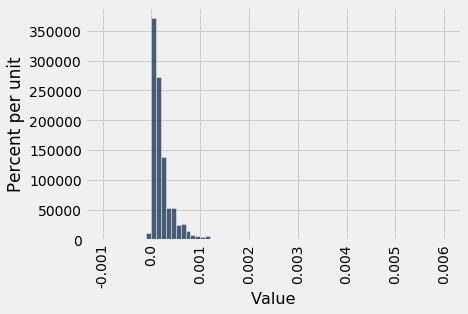

In [4]:
full_data_with_value = full_data.with_column("Value", full_data.column("Points")/full_data.column("Salary"))
# Find the minimum and maximum value first, then decide the bin from there
max_value = max(full_data_with_value.column('Value'))
min_value = min(full_data_with_value.column('Value'))
print('Max value is:', max_value)
print('Min value is:', min_value)
bins_specs = np.arange(min_value-0.001, max_value+0.001, 0.0001)
full_data_with_value.hist("Value", bins = bins_specs)

Now suppose we weren't able to find out every player's salary.  (Perhaps it was too costly to interview each player.)  Instead, we have gathered a *simple random sample* of 100 players' salaries.  The cell below loads those data.

In [5]:
sample_salary_data = Table.read_table("sample_salary_data.csv")
sample_salary_data.show(3)

PlayerName,Salary
C.J. Watson,2106720
Taj Gibson,8000000
Jerrelle Benimon,35000


**Question 3.** Make a histogram of the values of the players in `sample_salary_data`, using the same method for measuring value we used in question 2.  **Use the same bins, too.**  *Hint:* This will take several steps.

Max value is: 0.002260754489697237
Min value is: 0.0


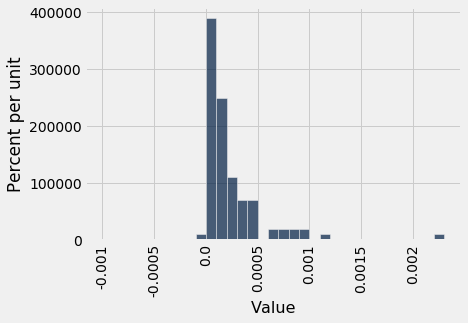

In [7]:
# Use this cell to make your histogram.
sample_full_data = player_data.join('Name', sample_salary_data, 'PlayerName')
sample_with_value = sample_full_data.with_column("Value", sample_full_data.column("Points")/sample_full_data.column("Salary"))
sample_max_value = max(sample_with_value.column('Value'))
sample_min_value = min(sample_with_value.column('Value'))
print('Max value is:', sample_max_value)
print('Min value is:', sample_min_value)
bins_specs = np.arange(sample_min_value-0.001, sample_max_value+0.0001, 0.0001)
sample_with_value.hist("Value", bins = bins_specs)

Now let us summarize what we have seen.  To guide you, we have written most of the summary already.

**Question 4.** Complete the statements below by filling in the [SQUARE BRACKETS]:

The plot in question 2 displayed a `histogram` of the population of `492` players.  The sum of the areas of the bars in the plot was `1`.

The plot in question 3 displayed an `empirical histogram` of the sample of `100` players.  The sum of the areas of the bars in the plot was `1`.

**Question 5.** Does the plot in question 3 accurately depict the proportion of players *in the population* whose value is between 0 and 0.0005?  (Note the number of 0s.)  What about players with value above 0.0005?

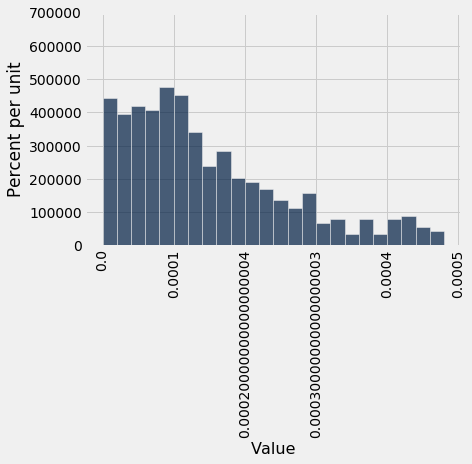

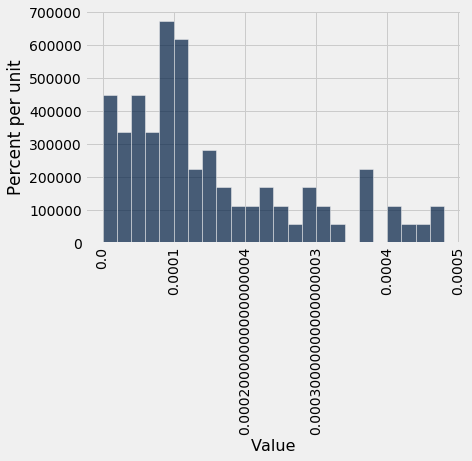

In [19]:
# Histogram comparison of values between 0 to 0.0005

full_data_with_value.hist("Value", bins = np.arange(0, 0.0005, 0.00002))
plt.ylim(None, 7000)
sample_with_value.hist("Value", bins = np.arange(0, 0.0005, 0.00002))

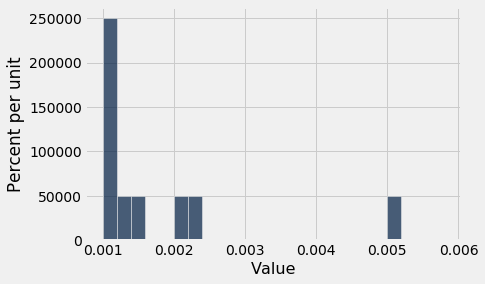

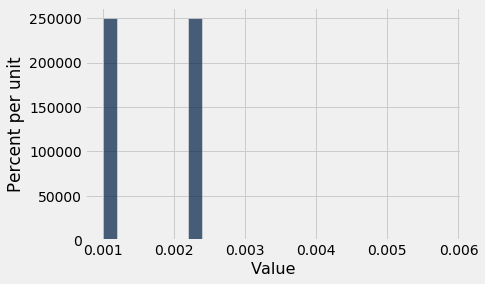

In [25]:
#Histogram comparison of values above 0.0005

full_data_with_value.hist("Value", bins = np.arange(0.001, 0.006, 0.0002))
sample_with_value.hist("Value", bins = np.arange(0.001, 0.006, 0.0002))

#### Answer:
For values below 0.0005, the sample empirical histogram is somewhat a close representation of the population histogram since both histograms have similar shape. It is not the case for the values above 0.0005 since the data points are scarce. For values above 0.0005, the sample empirical histogram does not quite represent the population histogram.

In [ ]:
# For your convenience, you can run this cell to run all the tests at once!
import os
print("Running all tests...")
_ = [tests.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q')]
print("Finished running all tests.")